#Analyzing Key Factors Influencing U.S. Home Prices: A Data-Driven Approach Using the S&P Case-Schiller Home Price Index
---

In this project, I explored publicly available data on critical economic and demographic factors that impact U.S. home prices over the past 20 years. By leveraging the S&P Case-Schiller Home Price Index as a proxy for housing prices, I built and evaluated a data science model to uncover how variables such as GDP, GDP per capita, unemployment rate, housing starts, building permits, population, and mortgage rates have influenced the US national home prices.



###List of Factors Considered
1. **GDP (Gross Domestic Product)**:
   - The total market value of all goods and services produced within a country’s borders in a given period, typically measured annually or quarterly. It reflects the overall economic activity and health of the economy.

2. **GDP per Capita**:
   - The GDP divided by the total population of the country, providing an average economic output per person. It is a measure of the average income of a country's residents and indicates the standard of living.

3. **Unemployment Rate**:
   - The percentage of the labor force that is jobless and actively seeking employment. It reflects the health of the labor market and is an important indicator of economic stability and growth.

4. **Housing Starts**:
   - The number of new residential construction projects that have begun over a specific period. It indicates the level of new housing development and is a measure of housing market activity and construction industry health.

5. **Building Permits**:
   - The number of permits issued for new construction or major renovations. It provides a forward-looking indicator of future housing starts and construction activity.

6. **Population**:
   - The total number of people residing in the country. It is a fundamental demographic measure that influences and interacts with various economic and social metrics.

7. **Mortgage Rates**:
   - The interest rates charged on home loans. They affect the affordability of borrowing for home purchases and refinancing, influencing the housing market and overall economic conditions. Lower rates can stimulate housing demand, while higher rates might dampen it.

In [ ]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from functools import reduce
import seaborn as sns
import numpy as np

In [ ]:
#Importing the Datasets as Pandas Dataframe
house_price_data = pd.read_csv('house_price.csv',parse_dates=['DATE'],index_col='DATE')
house_price_data.head()

,CSUSHPISA
DATE,
2004-01-01,141.647
2004-02-01,143.192
2004-03-01,145.058
2004-04-01,146.592
2004-05-01,148.186


In [ ]:
house_price_data = house_price_data.rename(columns = {'CSUSHPISA':'House Price'})
house_price_data.head()

,House Price
DATE,
2004-01-01,141.647
2004-02-01,143.192
2004-03-01,145.058
2004-04-01,146.592
2004-05-01,148.186


In [ ]:
print(house_price_data.describe())

       House Price
count   241.000000
mean    189.768635
std      48.563251
min     136.531000
25%     152.849000
50%     177.261000
75%     206.535000
max     315.728000


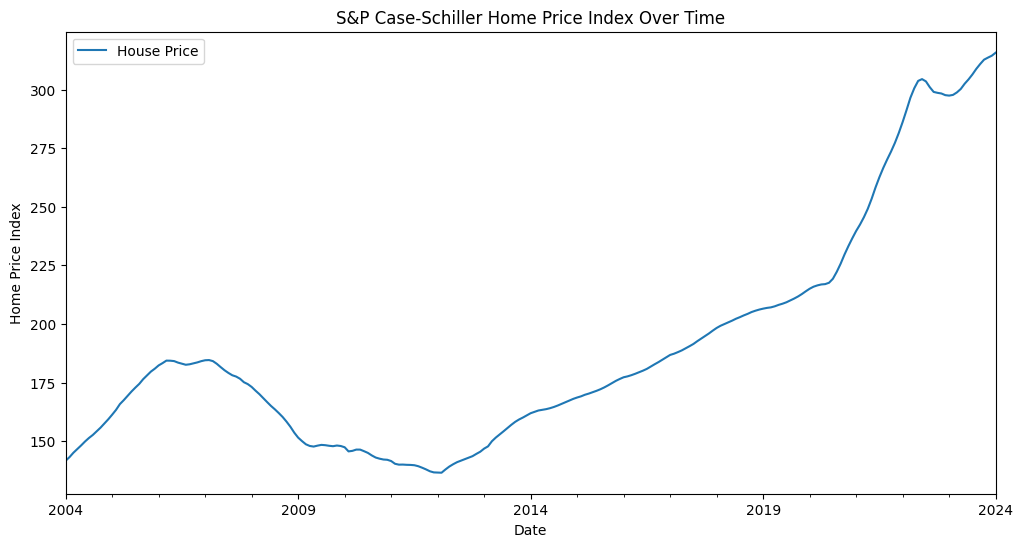

In [ ]:
house_price_data.plot(figsize=(12,6))
plt.title('S&P Case-Schiller Home Price Index Over Time')
plt.xlabel('Date')
plt.ylabel('Home Price Index')
plt.show()

In [ ]:
#Importing more Datasets
GDP = pd.read_csv('GDP.csv',parse_dates=['DATE'])
GDP_per_capita = pd.read_csv('GDP Per Capita.csv',parse_dates=['DATE'])
Unemployement_rate = pd.read_csv('Unemployement rate.csv',parse_dates=['DATE'])
Mortgage = pd.read_csv('MORTGAGE.csv',parse_dates=['DATE'])
housing_starts = pd.read_csv('HOUSING STARTS.csv',parse_dates=['DATE'])
permit = pd.read_csv('PERMIT.csv',parse_dates=['DATE'])
population = pd.read_csv('Population.csv',parse_dates=['DATE'])

In [ ]:
def plot_correlation(df1,df2,str1):
    df = pd.merge(df1,df2, on='DATE')
    # Create a figure and a set of subplots
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot the first DataFrame's series on the primary y-axis
    ax1.plot(df['DATE'], df[df1.columns[0]], label=df1.columns[0], color='blue')
    ax1.set_xlabel('Date')
    ax1.set_ylabel(df1.columns[0], color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Set the locator for x-axis to every 2 years
    locator = mdates.YearLocator(2)
    formatter = mdates.DateFormatter('%Y')
    ax1.xaxis.set_major_locator(locator)
    ax1.xaxis.set_major_formatter(formatter)

    # Rotate the x-axis labels for better readability
    plt.gcf().autofmt_xdate()

    # Create a secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(df['DATE'], df[df2.columns[1]], label=df2.columns[1], color='green')
    ax2.set_ylabel(df2.columns[1], color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    # Set the title
    plt.title(str1)

    # Add a legend
    fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

    # Display the plot
    plt.show()

#Plots of Various Factors and House Price

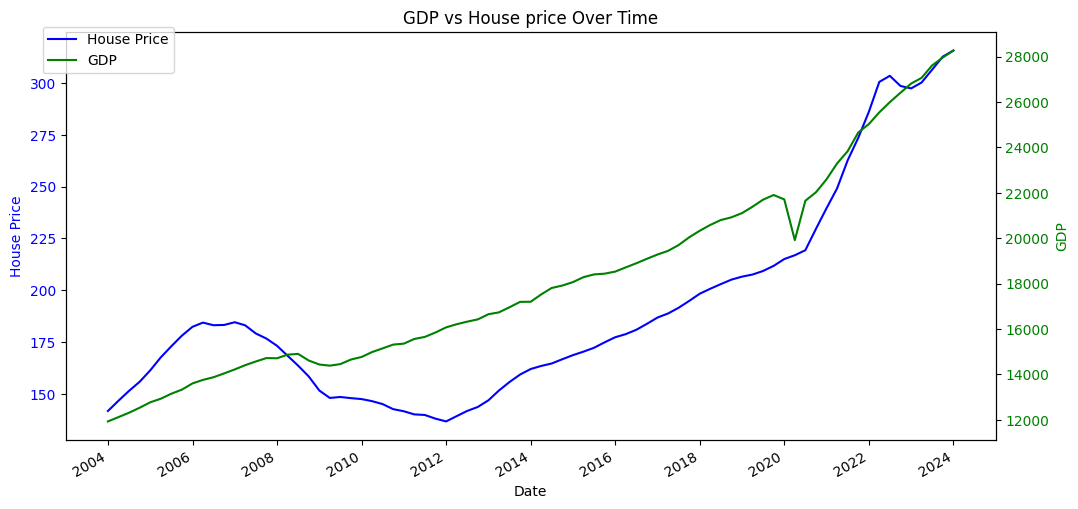

In [ ]:
plot_correlation(house_price_data,GDP,'GDP vs House price Over Time')

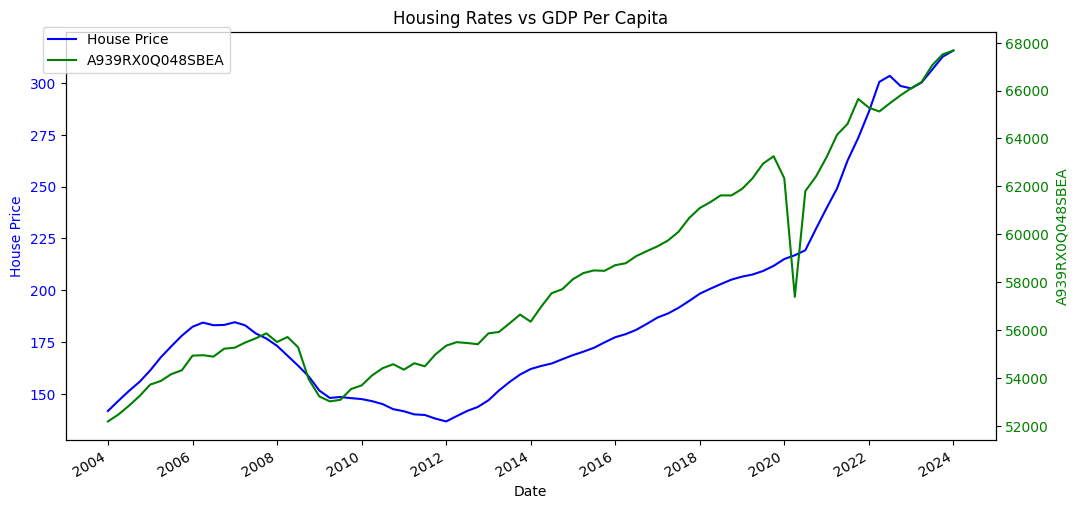

In [ ]:
plot_correlation(house_price_data, GDP_per_capita, 'Housing Rates vs GDP Per Capita')

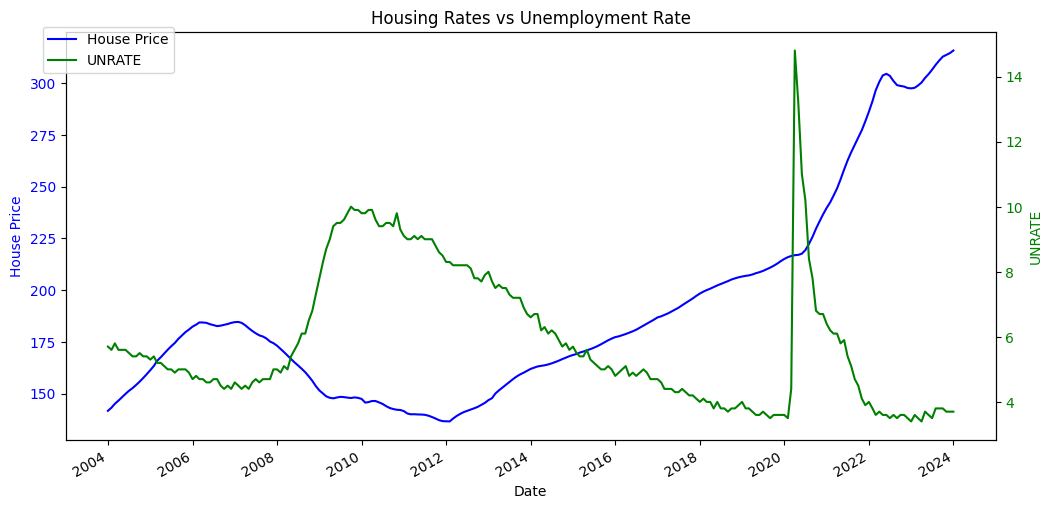

In [ ]:
plot_correlation(house_price_data, Unemployement_rate, 'Housing Rates vs Unemployment Rate')

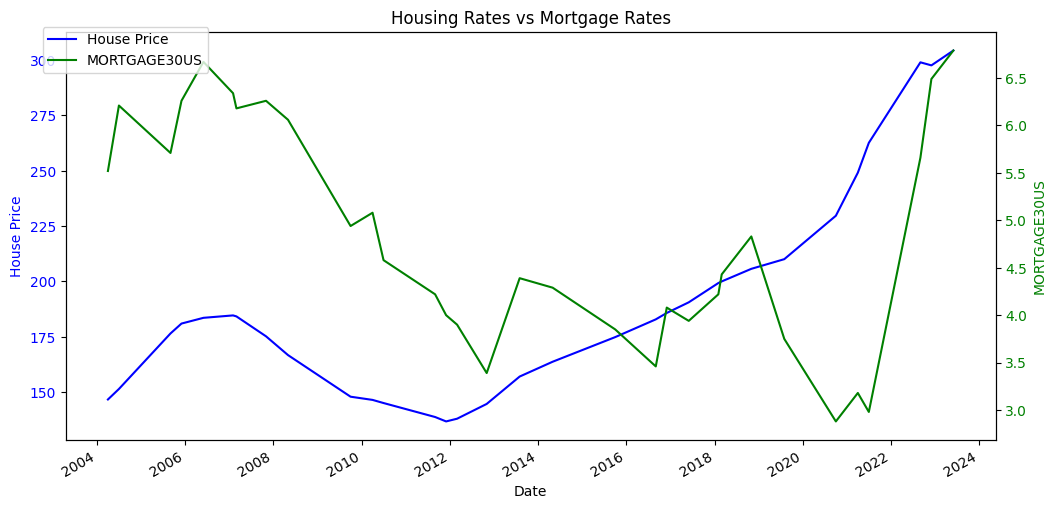

In [ ]:
plot_correlation(house_price_data, Mortgage, 'Housing Rates vs Mortgage Rates')

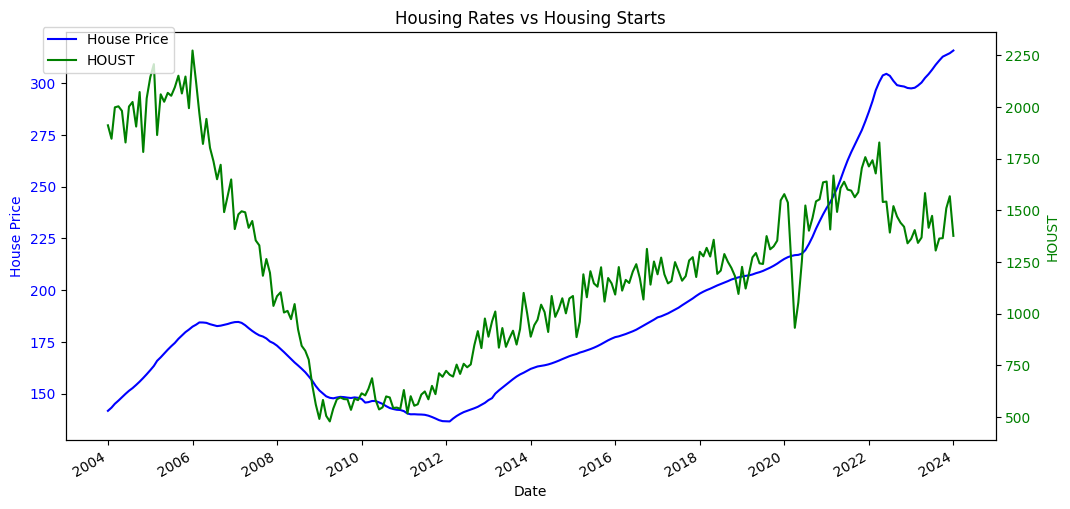

In [ ]:
plot_correlation(house_price_data, housing_starts, 'Housing Rates vs Housing Starts')

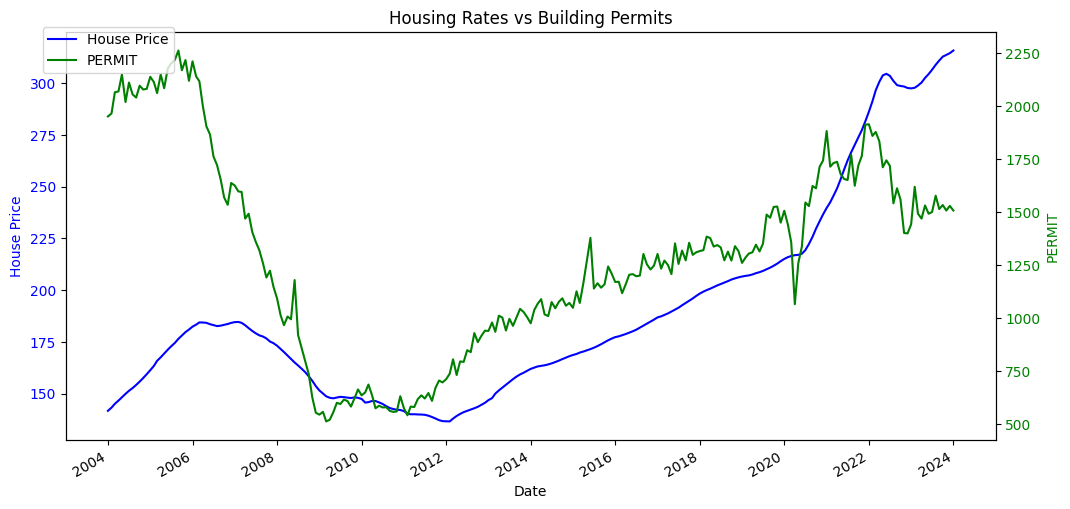

In [ ]:
plot_correlation(house_price_data, permit, 'Housing Rates vs Building Permits')

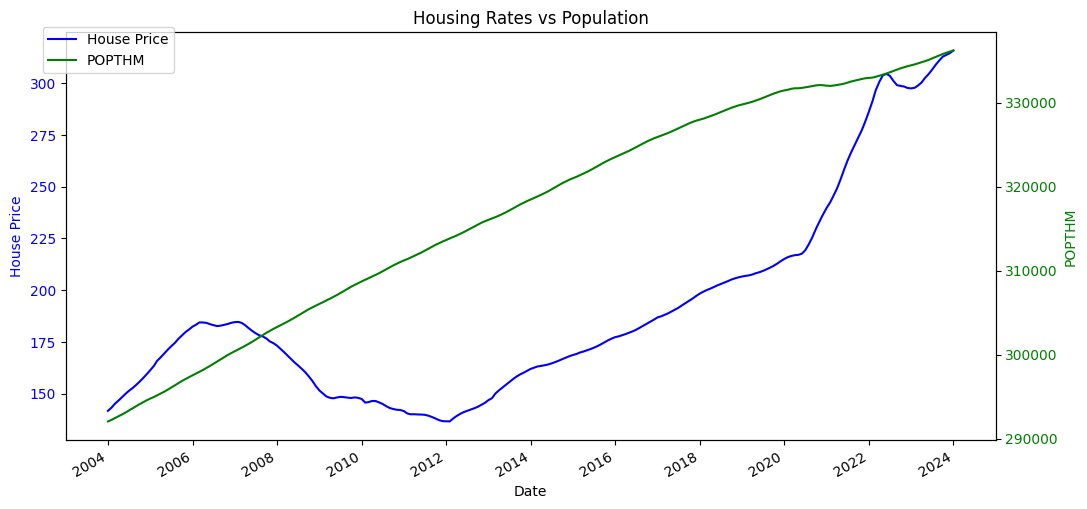

In [ ]:
plot_correlation(house_price_data, population, 'Housing Rates vs Population')

In [ ]:
merged_df = house_price_data.merge(GDP, on='DATE')\
                            .merge(GDP_per_capita, on='DATE') \
                            .merge(Unemployement_rate, on='DATE') \
                            .merge(housing_starts, on='DATE') \
                            .merge(permit, on='DATE') \
                            .merge(population, on='DATE')
merged_df = merged_df.rename(columns={'UNRATE':'Unemployment Rate'})
merged_df = merged_df.rename(columns={'MORTGAGE30US':'Mortgage'})
merged_df = merged_df.rename(columns={'HOUST':'Housing Starts'})
merged_df = merged_df.rename(columns={'PERMIT':'Building Permits'})
merged_df = merged_df.rename(columns={'POPTHM':'Population'})
merged_df = merged_df.rename(columns={'A939RX0Q048SBEA':'GDP per capita'})

In [ ]:
merged_df.head()

,DATE,House Price,GDP,GDP per capita,Unemployment Rate,Housing Starts,Building Permits,Population
0,2004-01-01,141.647,11923.447,52179.0,5.7,1911.0,1952.0,292046.0
1,2004-04-01,146.592,12112.815,52469.0,5.6,2003.0,2070.0,292651.0
2,2004-07-01,151.338,12305.307,52835.0,5.5,2002.0,2112.0,293350.0
3,2004-10-01,155.752,12527.214,53242.0,5.5,2072.0,2097.0,294104.0
4,2005-01-01,161.289,12767.286,53719.0,5.3,2144.0,2139.0,294768.0


#Correlation coefficient between various features

<function matplotlib.pyplot.show(close=None, block=None)>

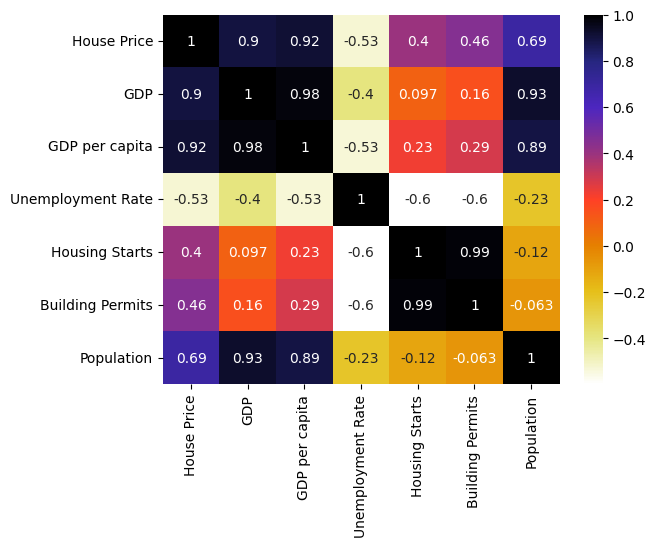

In [ ]:
merged_df = merged_df.drop(['DATE'], axis=1)
cor = merged_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show

In [ ]:
merged_df.head()

,House Price,GDP,GDP per capita,Unemployment Rate,Housing Starts,Building Permits,Population
0,141.647,11923.447,52179.0,5.7,1911.0,1952.0,292046.0
1,146.592,12112.815,52469.0,5.6,2003.0,2070.0,292651.0
2,151.338,12305.307,52835.0,5.5,2002.0,2112.0,293350.0
3,155.752,12527.214,53242.0,5.5,2072.0,2097.0,294104.0
4,161.289,12767.286,53719.0,5.3,2144.0,2139.0,294768.0


In [ ]:
X= merged_df.iloc[:,1:]
y= merged_df.iloc[:,0]

#Feature Importance of Various Features
**How much a factor affects the house price**

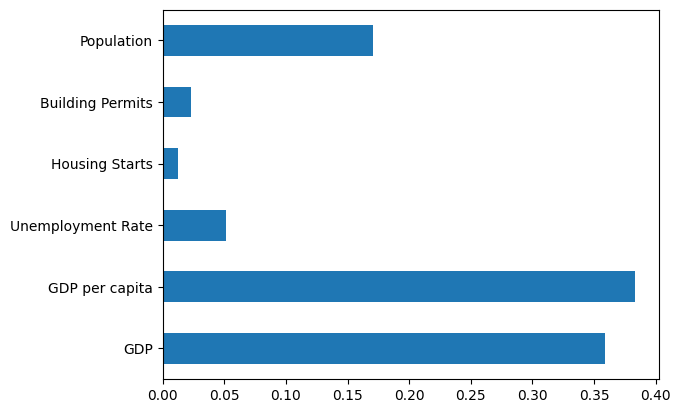

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.plot(kind='barh')
plt.show()

**We can see that the most affecting factors were GDP and GDP per Capita whereas Population also had a significance impact.**

#MORTGAGE

**We had to target Mortage differently from others as time period here is very different to others as other factors are calculated monthly or quaterly this is calculated weekly every thursday making it difficult to overlap it with other factors.**

In [ ]:
merged_with_mortgage = house_price_data.merge(Mortgage, on='DATE')
merged_with_mortgage.head()

,DATE,House Price,MORTGAGE30US
0,2004-04-01,146.592,5.52
1,2004-07-01,151.338,6.21
2,2005-09-01,176.437,5.71
3,2005-12-01,180.910,6.26
4,2006-06-01,183.507,6.67


In [ ]:
merged_with_mortgage = merged_with_mortgage.rename(columns={'MORTGAGE30US':'Mortgage'})
merged_with_mortgage.drop(['DATE'], axis=1,inplace = True)

In [ ]:
X = merged_with_mortgage.iloc[:,1]
y = merged_with_mortgage.iloc[:,0]

In [ ]:
correlation = merged_with_mortgage['Mortgage'].corr(merged_with_mortgage['House Price'])
print(f"Pearson Correlation Coefficient: {correlation}")

Pearson Correlation Coefficient: 0.11832210580875147


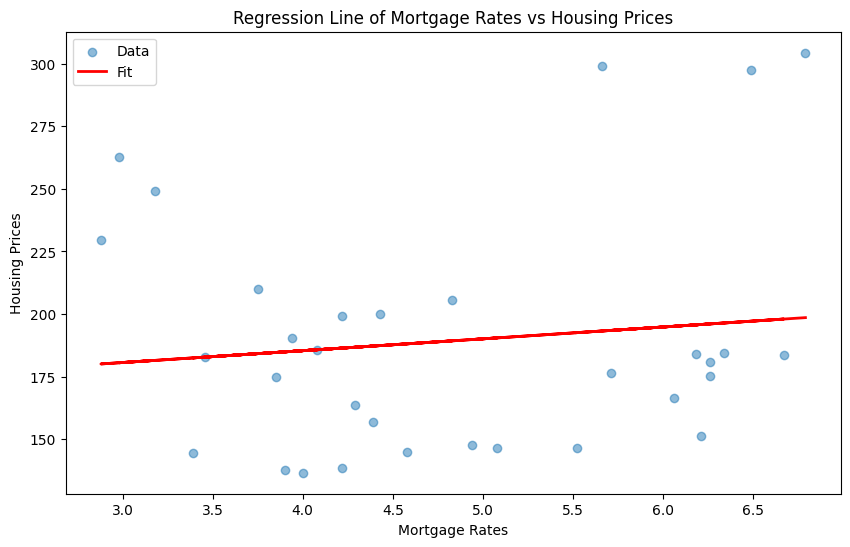

In [ ]:
from sklearn.linear_model import LinearRegression

# Reshape for sklearn
X = merged_with_mortgage['Mortgage'].values.reshape(-1, 1)
y = merged_with_mortgage['House Price'].values

# Fit the regression model
model = LinearRegression()
model.fit(X, y)

# Plot the regression line
plt.figure(figsize=(10, 6))
plt.scatter(merged_with_mortgage['Mortgage'], merged_with_mortgage['House Price'], alpha=0.5, label='Data')
plt.plot(merged_with_mortgage['Mortgage'], model.predict(X), color='red', linewidth=2, label='Fit')
plt.title('Regression Line of Mortgage Rates vs Housing Prices')
plt.xlabel('Mortgage Rates')
plt.ylabel('Housing Prices')
plt.legend()
plt.show()

**So as we can see here Mortgage rates do not affect the housing prices much or even if they do they are not very related.**

#Indirect Factors and Time-Dependent Impact

Some factors may not show a direct relationship with house prices initially but can influence them over time. The delayed effects can be better understood using Recurrent Neural Networks (RNNs), which capture temporal dependencies and trends, making them suitable for modeling the time-dependent impact of various factors on house prices.

#Similarity in Trajectories

Some factors may not correlate strongly with house prices when viewed directly, but their overall trends and patterns over time could resemble those of house prices. By comparing the first derivative of the graphs representing these factors and house prices, we can identify similarities in their growth rates and trends, helping to recognize factors that move in tandem with house prices even if their direct correlation is weak.

#In Conclusion :


*   Most affecting factors were GDP and GDP per Capita
*   Population building permits and Unemployment Rates are somewhat responsible.
*   Mortgage rates and Housing Starts are very less related to Housing Prices.







